# Analysis of all analysis
Gather all csv files in a data frame and explore the datasets

In [1]:
import glob
import pandas as pd
cellfiles = glob.glob('/media/cephfs/data/StressGranule/results/cells*.csv')
cells = pd.concat([ pd.read_csv(c) for c in cellfiles])
cells.to_csv('cells.csv')
granulefiles =  glob.glob('/media/cephfs/data/StressGranule/results/granules*.csv')
granules = pd.concat([ pd.read_csv(c) for c in granulefiles])
granules.to_csv('granules.csv')

In [2]:
# display the number of cell per condition
pd.DataFrame(cells.groupby(by='Condition').size())

,0
Condition,
BICD2,111
CAPRIN,123
FXR1,171
KIF5B,168


In [4]:
def facet_plot(data,cols,columns=4):
    import math
    rows = len(cols)//columns
    fig, ax = plt.subplots(rows,columns,figsize=(6*columns,6*rows))    
    for r in range(rows):
        for c in range(columns):
            if columns * r + c < len(cols)-1:
                sns.boxplot(data=data,x="Condition",y=cols[columns*r+c],ax=ax[r,c])                  
                sns.despine(left=True)


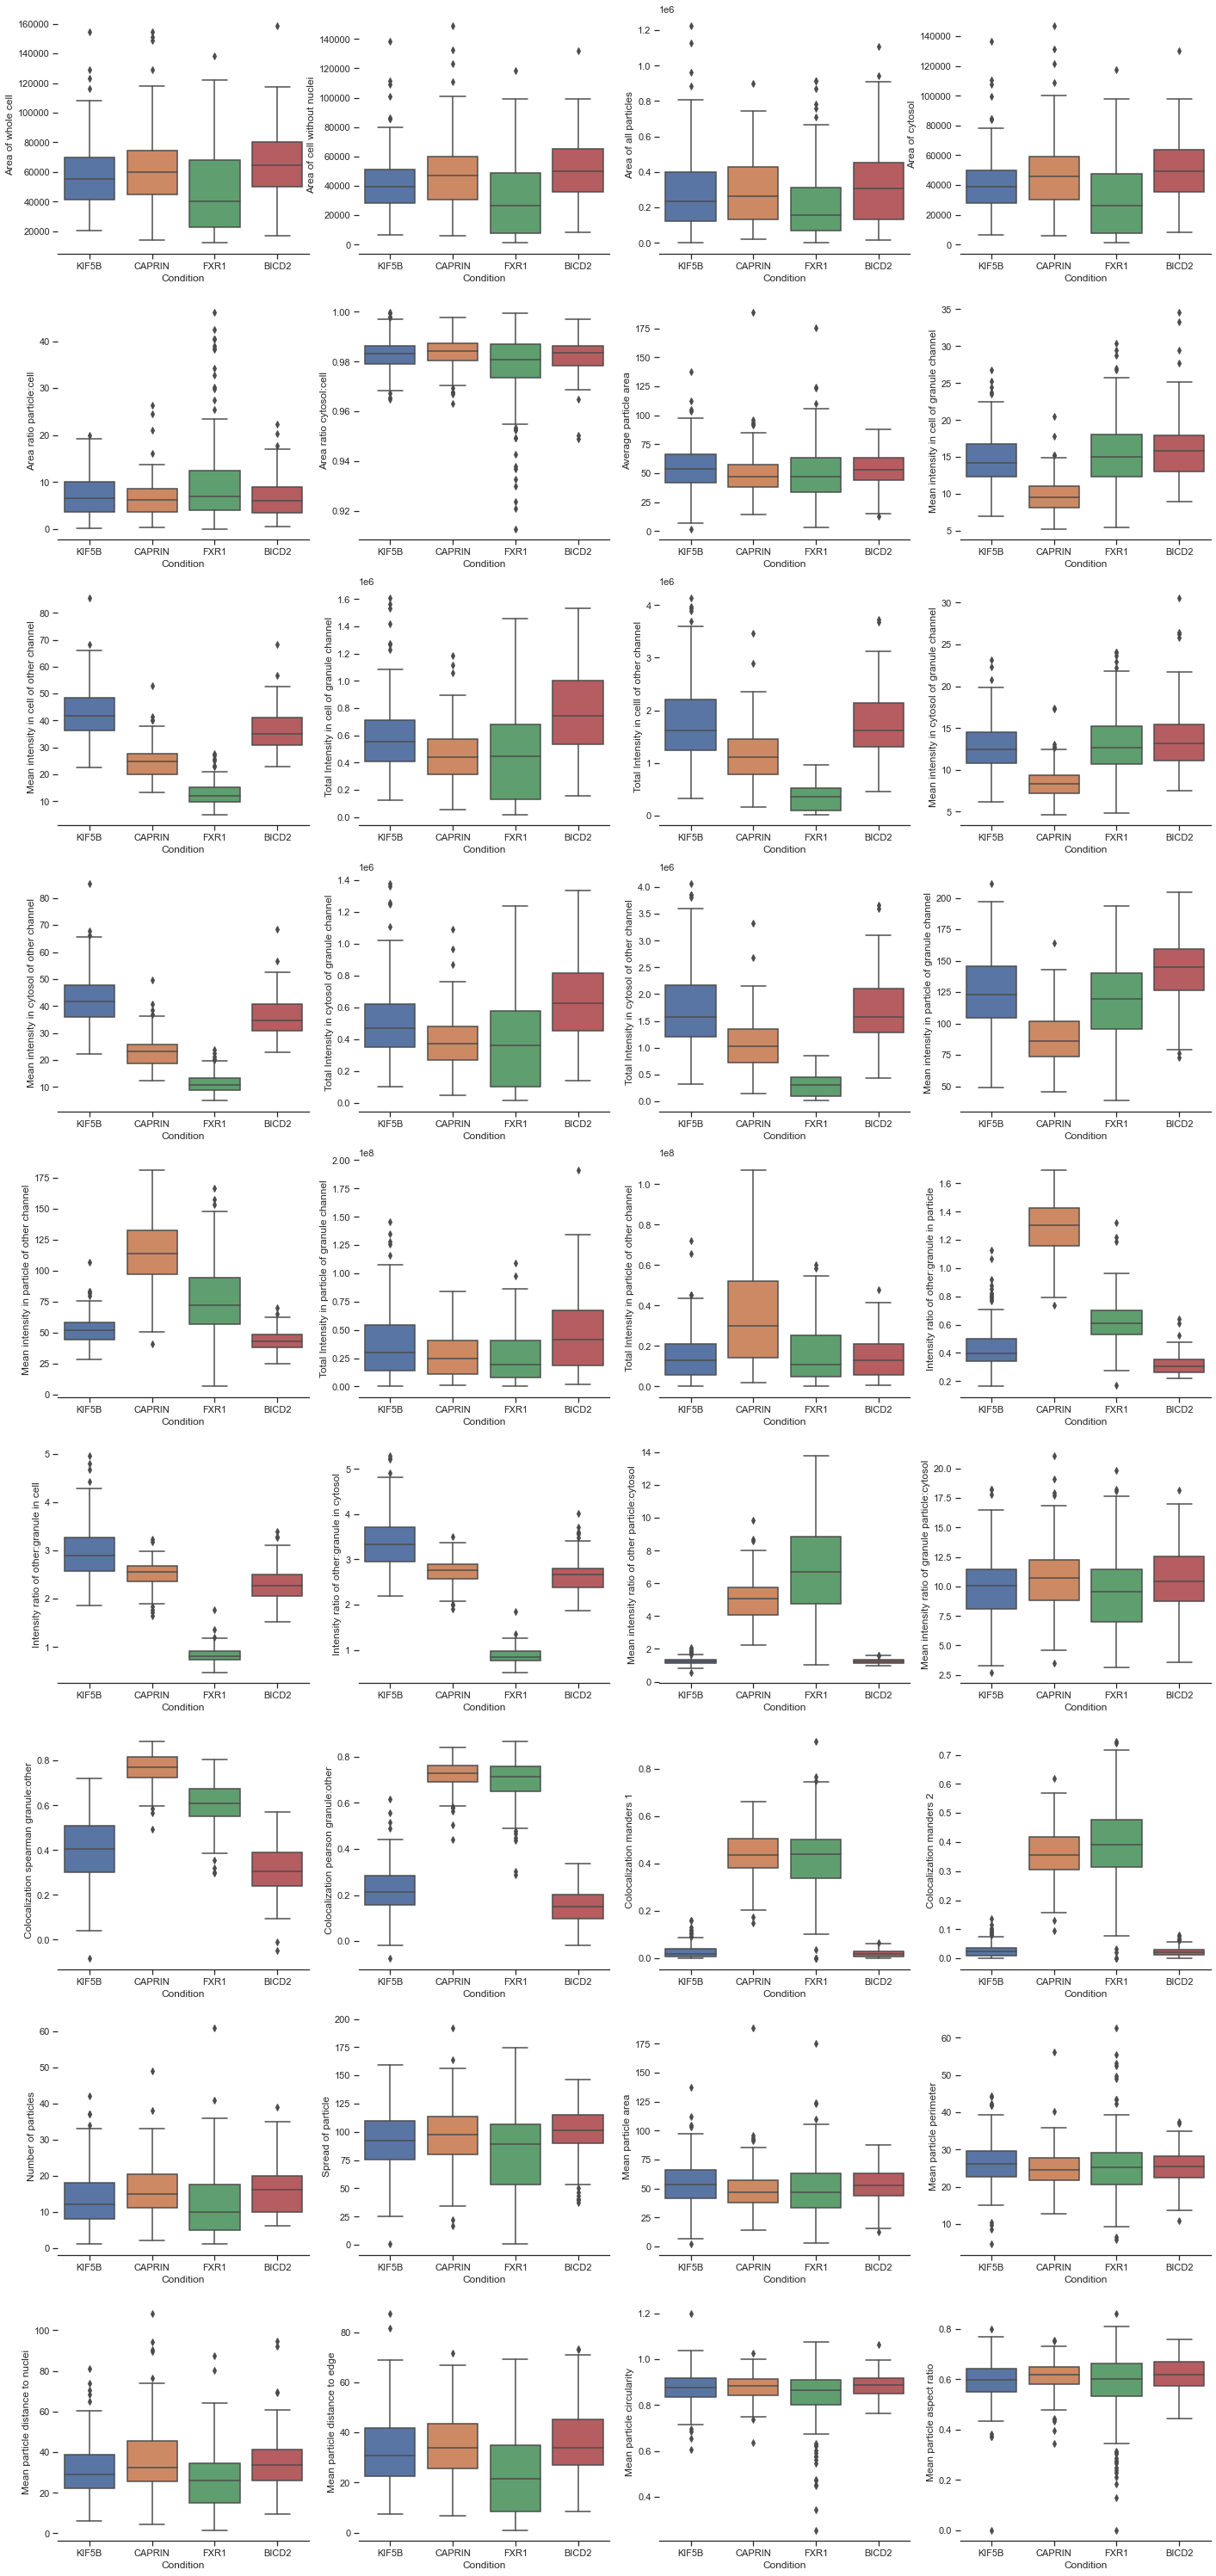

In [5]:
# plot for the cell by cell file
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("ticks")
facet_plot(cells,cells.columns[2:-3],4)
plt.savefig('cells.pdf')

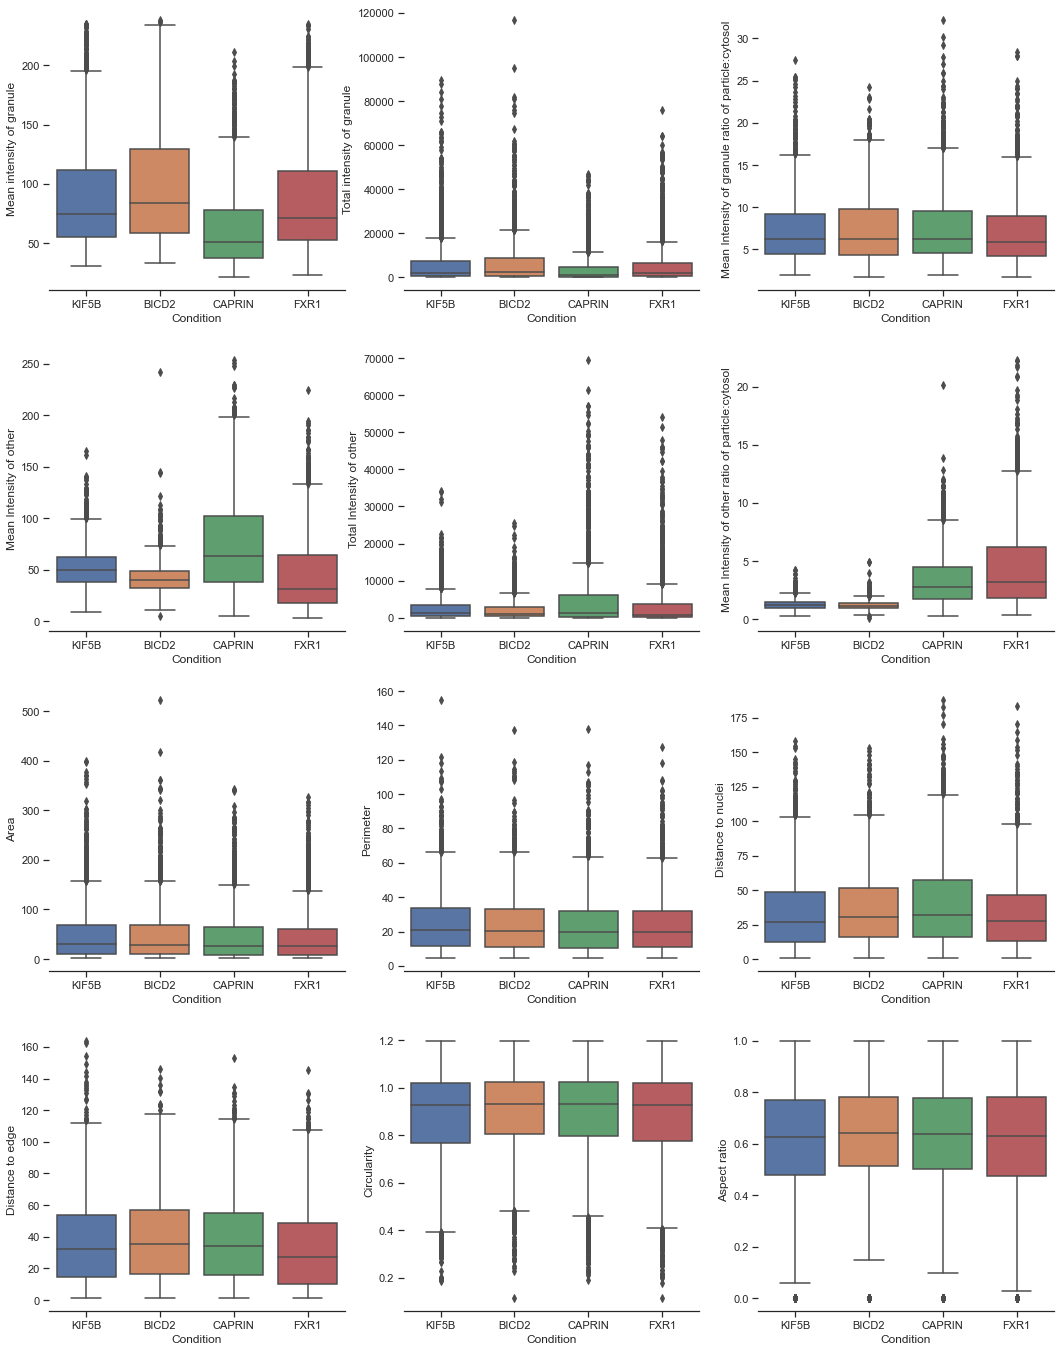

In [6]:
# all graphs for the the granule by granule file
facet_plot(granules, granules.columns[3:17], 3)
plt.savefig('granules.pdf')
